In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

## Loss Functions

### Sum of squares for error, SSE

In [3]:
# y : results of softmax
# t : one-hot-label of answer
def sum_squares_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

In [4]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### cross entropy error, CEE

In [6]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

In [7]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

## Mini batch and calc loss

In [9]:
from sklearn.model_selection import train_test_split

X, y = mnist.data.values, mnist.target.values
y_ = np.zeros((y.shape[0], 10))
for i in range(y.shape[0]):
  y_[i,int(y[i])] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=.2)

In [10]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch, y_batch = X_train[batch_mask], y_train[batch_mask]

In [11]:
def cross_entropy_error_with_onehotencoding(y, t):
  delta = 1e-7
  if y.ndim == 1:
    return -np.sum(t * np.log(y + delta))
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + delta)) / batch_size

In [12]:
def cross_entropy_error_with_label_array(y, t):
  delta = 1e-7
  if y.ndim == 1:
    return -np.sum(np.log(y[t] + delta))
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + delta)) / batch_size 

## Numberical Differential

In [13]:
def numerical_diff(f, x):
  delta = 1e-4
  return (f(x + delta) - f(x - delta)) / (2 * delta)

In [14]:
def function_1(x):
  return 2.0*x**2 + 0.1*x

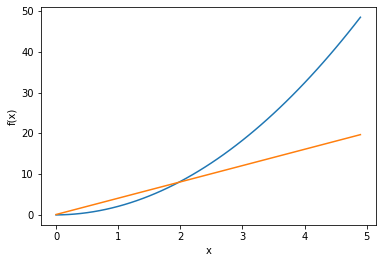

In [15]:
x = np.arange(0.0, 5.0, 0.1)
y = function_1(x)
y_ = numerical_diff(function_1, x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, y_)
plt.show()

In [16]:
def function_2(x):
  return x[:, 0]**2 + x[:, 1]**2

In [93]:
def numerical_diff(f, x):
  delta = 0.0001

  if x.ndim == 1:
    x = x.reshape(1, -1)

  grad = np.zeros_like(x)
  for idx in range(x.shape[1]):
    temp = x[:,idx]
    x[:,idx] = temp + delta
    f1 = f(x)
    x[:,idx] = temp - delta - delta
    f2 = f(x)
    print(f1.shape, f2.shape)
    print()
    grad[:,idx] = 1. * (f1 - f2) / (2. * delta)
    x[:,idx] = temp
  if x.shape[0] == 1:
    grad = grad.reshape(-1) 
  return grad

In [72]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  course = []
  for i in range(step_num):
    grad = numerical_diff(f, x)
    x -= lr * grad
    course.append(x.tolist())
  return x, np.array(course)

In [35]:
numerical_diff(function_2, np.array([3.0, 4.0]))

array([3.00005, 4.00005])

In [36]:
numerical_diff(function_2, np.array([0.0, 2.0]))

array([4.99999997e-05, 2.00005000e+00])

In [37]:
numerical_diff(function_2, np.array([3.0, 0.0]))

array([3.00005000e+00, 5.00000041e-05])

In [73]:
init_x = np.array([-3.0, 4.0])
x, course = gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

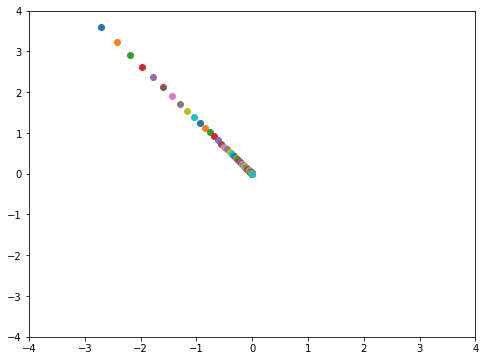

In [39]:
plt.figure(figsize=(8,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
for point in course:
  plt.scatter(point[0], point[1])
plt.show()

In [40]:
def softmax(x):
  c = np.max(x)
  _ = np.exp(x + c)
  __ = np.sum(_)
  return _ / __

def cross_entropy_error(y, t):
  delta = 1e-7
  if y.ndim == 1:
    y, t = y.reshape(1, y.size), t.reshape(1, t.size)
  n = y.shape[0]
  return -np.sum(np.log(y[np.arange(n),t] + delta)) / n

In [87]:
class SimpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)
  
  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error_with_onehotencoding(y, t)
    return loss

In [88]:
net = SimpleNet()
net.W

array([[-0.65237776,  0.03826159,  0.251349  ],
       [ 0.26708449,  0.46629228,  0.34735071]])

In [89]:
x = np.array([0.6, 0.9])
p = net.predict(x)
np.argmax(p)

2

In [90]:
t = np.array([0, 1, 0])
net.loss(x, t)

0.9451963454157761

In [91]:
def f(W):
  return net.loss(x, t)

In [95]:
print(net.W)
dW = numerical_diff(f, net.W)
print(dW)

[[-0.65257776  0.03806159  0.251149  ]
 [ 0.26688449  0.46609228  0.34715071]]
() ()

() ()

() ()

[[ 0.32193604 -0.91707625  0.59521283]
 [ 0.32193604 -0.91707625  0.59521283]]
